ANN_3
用前120个（N=120）power+speed，预测之后P=60 （30min）的参数
【next】：理解ANN模型和keras.Sequential的含义；由此调参数；   效果不错之后延长预测时间；
【next】：考虑另一种预测方法，用预测出来的结果输入模型，然后预测接下来的结果。（这叫滑动窗口嘛）
用前120个数据点，预测之后的60个数据点（60min ——> 30min)
有一定的效果
需要理解ANN模型的搭建（keras.Sequential部分需要了解）
然后明白了模型是啥样的之后，调一下参数，应该会得到更好的结果。

https://keras-cn.readthedocs.io/en/latest/getting_started/functional_API/
keras中文文档


In [2]:
# -*- coding: utf-8 -*-
#coding:unicode_escape
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 显示中文标签
plt.rcParams['axes.unicode_minus'] = False#解决负数问题

In [3]:
df = pd.read_csv("C:/Users/24496/Desktop/BigData/wind_raw.csv",encoding='unicode_escape')
df = df[['date','power','speed','day']]
df

,date,power,speed,day
0,2015/10/1 0:00,0.38065,0.39627,1
1,2015/10/1 0:00,0.36943,0.39592,1
2,2015/10/1 0:01,0.38529,0.39538,1
3,2015/10/1 0:01,0.38892,0.39579,1
4,2015/10/1 0:02,0.41220,0.39627,1
...,...,...,...,...
89275,2015/10/31 23:57,0.10177,0.27803,31
89276,2015/10/31 23:58,0.10354,0.27682,31
89277,2015/10/31 23:58,0.10008,0.27529,31
89278,2015/10/31 23:59,0.10516,0.27481,31


In [4]:
df_only_power = df[['power','speed']]
df_only_power


,power,speed
0,0.38065,0.39627
1,0.36943,0.39592
2,0.38529,0.39538
3,0.38892,0.39579
4,0.41220,0.39627
...,...,...
89275,0.10177,0.27803
89276,0.10354,0.27682
89277,0.10008,0.27529
89278,0.10516,0.27481


In [5]:
#使用前8天的数据做训练
df_train = df_only_power.iloc[:8*2880]
df_train
# df_train.isnull().values.any()   False

,power,speed
0,0.38065,0.39627
1,0.36943,0.39592
2,0.38529,0.39538
3,0.38892,0.39579
4,0.41220,0.39627
...,...,...
23035,0.25603,0.35394
23036,0.26225,0.35508
23037,0.25419,0.35329
23038,0.26028,0.35799


这里read_data和ANN_1不一样了。
改成，用之前N=30*2个数据预测后15min的数据

In [6]:
# import pandas as pd
# daaaa= pd.DataFrame([1,2,3,4,5,6,7,8,9,10])
# def read_data(N,P):  #N是特征数目，就是用之前多少个power来预测；P是预测未来多少min之后的

#     data = daaaa.values
#     X = []
#     Y = []
#     for i in range(N,len(data)-P):  #
#         # print("i:",i)
#         s=[]
#         for j in range(i-N,i):
#             # print(j)
#             s.append(data[j][0])
#             # print(s)
#         X.append(s)
#         t=[]
#         for k in range(i,i+P):   #Y是对未来的预测，预测的是好几个数值，现在是之后P/2分钟的结果。
#             t.append(data[k][0])
#         Y.append(t)
#     print("X",X)
#     print(Y)

#     # return np.array(X),np.array(Y)
# read_data(3,2)

In [7]:

def read_data(N,P):  #N是特征数目(此处是一个N代表一个power+一个speed，就是用之前多少个power(和speed)来预测；P是预测未来多少min之后的

    data = df_train.values
    # print(data)
    X = []
    Y = []
    for i in range(N,len(data)-P):  #
        # print("i:",i)
        s=[]
        for j in range(i-N,i):
            # print(j)
            s.append(data[j][0])
            s.append(data[j][1])
            # print(s)

        X.append(s)
        t=[]
        for k in range(i,i+P):   #Y是对未来的预测，预测的是好几个数值，现在是之后P/2分钟的结果。
            t.append(data[k][0])
        Y.append(t)
    # print("X",X)
    # print(Y)
    return np.array(X),np.array(Y)
N = 120
P = 60
x_train,y_train = read_data(N,P)

In [8]:
y_train

array([[0.34383, 0.34248, 0.32346, ..., 0.32702, 0.31376, 0.3242 ],
       [0.34248, 0.32346, 0.32027, ..., 0.31376, 0.3242 , 0.33992],
       [0.32346, 0.32027, 0.33486, ..., 0.3242 , 0.33992, 0.3497 ],
       ...,
       [0.19879, 0.20238, 0.2035 , ..., 0.24895, 0.25603, 0.26225],
       [0.20238, 0.2035 , 0.21161, ..., 0.25603, 0.26225, 0.25419],
       [0.2035 , 0.21161, 0.2078 , ..., 0.26225, 0.25419, 0.26028]])

In [9]:
# def read_data(N,P):  #N是特征数目，就是用之前多少个power来预测；P是预测未来多少min之后的

#     data = df_train.values
#     X = []
#     Y = []
#     for i in range(N,len(data)-P):  #
#         s=[]
#         for j in range(i-N,i):
#             s.append(data[j][0])
#         X.append(s)
#         Y.append(data[i][0])

#     return np.array(X),np.array(Y)

# Nset = 30*2 #用前20min的power预测后一个i

# N= Nset  
# X,Y = read_data(N)
# X


In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_train,y_train,test_size = 0.2)


In [14]:
x_test

array([[0.18221, 0.32029, 0.17531, ..., 0.28705, 0.11655, 0.28563],
       [0.561  , 0.44647, 0.56108, ..., 0.46034, 0.63749, 0.4614 ],
       [0.51071, 0.42613, 0.49281, ..., 0.43198, 0.55519, 0.43224],
       ...,
       [0.00171, 0.16666, 0.00168, ..., 0.18207, 0.00693, 0.18216],
       [0.48701, 0.42107, 0.49347, ..., 0.41552, 0.49821, 0.41582],
       [0.0983 , 0.26887, 0.09717, ..., 0.25243, 0.07554, 0.25115]])

In [12]:
epoch_num = 1000
batch_size = 250

In [13]:
#模型结构，采用relu函数为激活函数，输入层为N个属性
#下面为4层隐含层，每层的神经元个数依次为500，500，250，250
#输入层对应N个属性
N=120
model = keras.Sequential([
        keras.layers.Dense(500,activation='relu',input_shape=[2*N]),
        keras.layers.Dense(500,activation='relu'),
        keras.layers.Dense(250,activation='relu'),
        keras.layers.Dense(250,activation='relu'),
        keras.layers.Dense(250,activation='relu'),
        keras.layers.Dense(P)])#最后输出为P个数据，也就是预测的值
#定义损失函数loss，采用的优化器optimizer为Adam
model.compile(loss='mse',optimizer='Adam')
thismodel = model.fit(x_train,y_train,batch_size = batch_size,epochs=epoch_num)   #训练epochs个批次，每个批次数据量为batch_size

Epoch 1/1000
74/74 [==============================] - 1s 10ms/step - loss: 0.0098
Epoch 2/1000
74/74 [==============================] - 1s 11ms/step - loss: 0.0024
Epoch 3/1000
74/74 [==============================] - 1s 11ms/step - loss: 0.0021
Epoch 4/1000
74/74 [==============================] - 1s 10ms/step - loss: 0.0023
Epoch 5/1000
11/74 [===>..........................] - ETA: 0s - loss: 0.0023

KeyboardInterrupt: 

In [ ]:
loss= model.evaluate(x_train,y_train,verbose = 2)
rmse = loss**0.5
print("rmse ={}".format(rmse))

572/572 - 2s - loss: 1.1683e-04 - 2s/epoch - 3ms/step
rmse =0.01080883514768818


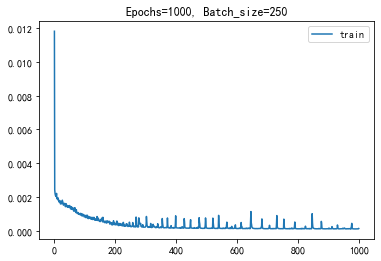

In [ ]:
# 绘制历史数据
plt.plot(thismodel.history['loss'], label='train')
# plt.plot(thismodel.history['val_loss'], label='test')
plt.title(f'Epochs={epoch_num}, Batch_size={batch_size}')
# plt.savefig(f'compare/{n}.png')
plt.legend()
plt.show()

In [ ]:
#使用第13天的数据做预测验证
df_test = df.iloc[12*2880:13*2880]
df_test
# df_test.isnull().values.any()

,date,power,speed,day
34560,2015/10/13 0:00,0.94013,0.73161,13
34561,2015/10/13 0:00,0.93126,0.73166,13
34562,2015/10/13 0:01,0.90801,0.73115,13
34563,2015/10/13 0:01,0.93979,0.73052,13
34564,2015/10/13 0:02,0.91326,0.72794,13
...,...,...,...,...
37435,2015/10/13 23:57,0.19256,0.34645,13
37436,2015/10/13 23:58,0.19485,0.34559,13
37437,2015/10/13 23:58,0.19554,0.34562,13
37438,2015/10/13 23:59,0.19210,0.34533,13


In [ ]:
df_test_only_power = df_test[['power','speed']]
df_test_only_power

,power,speed
34560,0.94013,0.73161
34561,0.93126,0.73166
34562,0.90801,0.73115
34563,0.93979,0.73052
34564,0.91326,0.72794
...,...,...
37435,0.19256,0.34645
37436,0.19485,0.34559
37437,0.19554,0.34562
37438,0.19210,0.34533


In [ ]:
# def read_data(N,P):  #N是特征数目，就是用之前多少个power来预测；P是预测未来多少min之后的

#     data = df_train.values
#     X = []
#     Y = []
#     for i in range(N,len(data)-P):  #
#         # print("i:",i)
#         s=[]
#         for j in range(i-N,i):
#             # print(j)
#             s.append(data[j][0])
#             # print(s)
#         X.append(s)
#         t=[]
#         for k in range(i,i+P):   #Y是对未来的预测，预测的是好几个数值，现在是之后P/2分钟的结果。
#             t.append(data[k][0])
#         Y.append(t)
#     # print("X",X)
#     # print(Y)
#     return np.array(X),np.array(Y)
# N = 120
# x_train,y_train = read_data(120,60)

In [ ]:
def read_data_test(N,P):  #N是特征数目，就是用之前多少个power 来预测后一个i   现在这还是预测后一个i！！！

    data = df_test_only_power.values
    X = []
    Y = []
    for i in range(N,len(data)-P):  #
        # print("i:",i)
        s=[]
        for j in range(i-N,i):
            # print(j)
            s.append(data[j][0])
            s.append(data[j][1])
            # print(s)
        X.append(s)
        t=[]
        for k in range(i,i+P):   #Y是对未来的预测，预测的是好几个数值，现在是之后P/2分钟的结果。
            t.append(data[k][0])
        Y.append(t)

    return np.array(X),np.array(Y)
N=120
P=60
x_test, y_test_true = read_data_test(N,P)
len(y_test_true)



2700

In [ ]:
x_test

NameError: name 'x_test' is not defined

In [ ]:
#输出结果预测
y_test_predict=model.predict(x_test)
# print('预测结果为：',y_test_predict)

85/85 [==============================] - 0s 3ms/step


In [ ]:
y_test_true

array([[0.94203, 0.95048, 0.94196, ..., 0.93167, 0.92203, 0.92972],
       [0.95048, 0.94196, 0.93791, ..., 0.92203, 0.92972, 0.9207 ],
       [0.94196, 0.93791, 0.94013, ..., 0.92972, 0.9207 , 0.92799],
       ...,
       [0.17511, 0.18897, 0.18264, ..., 0.19454, 0.19256, 0.19485],
       [0.18897, 0.18264, 0.20042, ..., 0.19256, 0.19485, 0.19554],
       [0.18264, 0.20042, 0.18536, ..., 0.19485, 0.19554, 0.1921 ]])

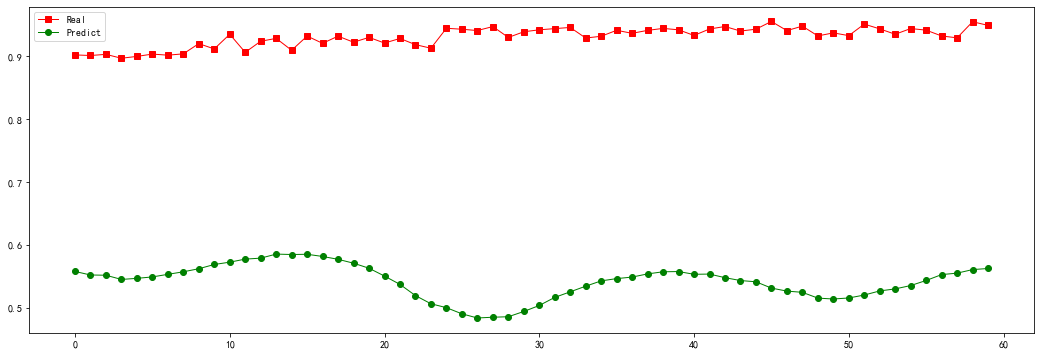

In [ ]:

t = np.arange(len(y_test_predict[4]))
plt.figure(figsize=(18,6))
plt.plot(t, y_test_true[40],"rs-", linewidth=1, label='Real')
plt.plot(t, y_test_predict[40], 'go-', linewidth=1, label='Predict')
plt.legend()
plt.show()


In [ ]:
len(y_test_predict)

2700

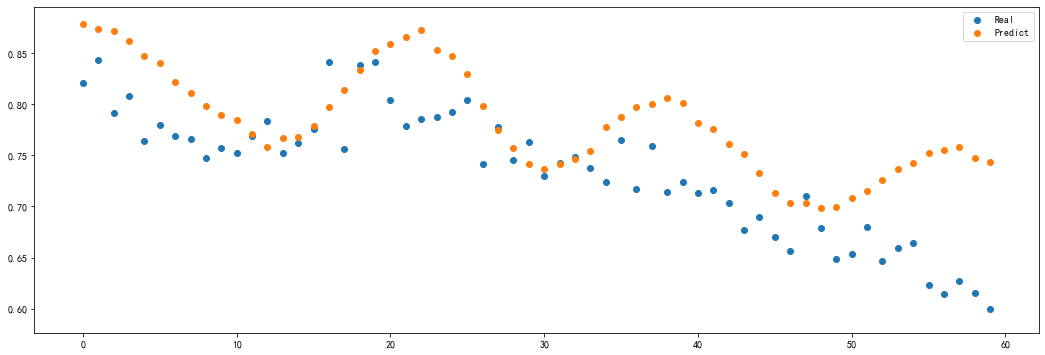

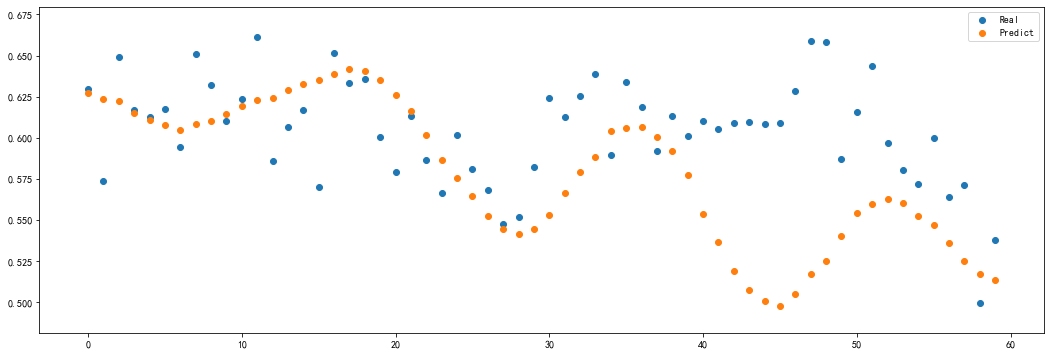

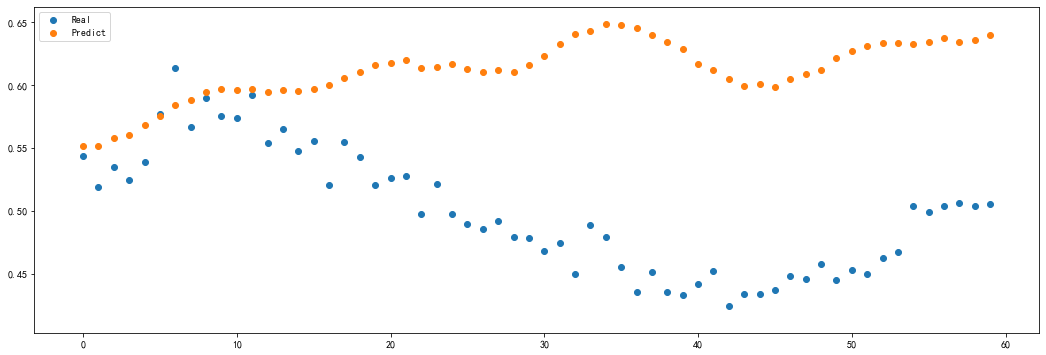

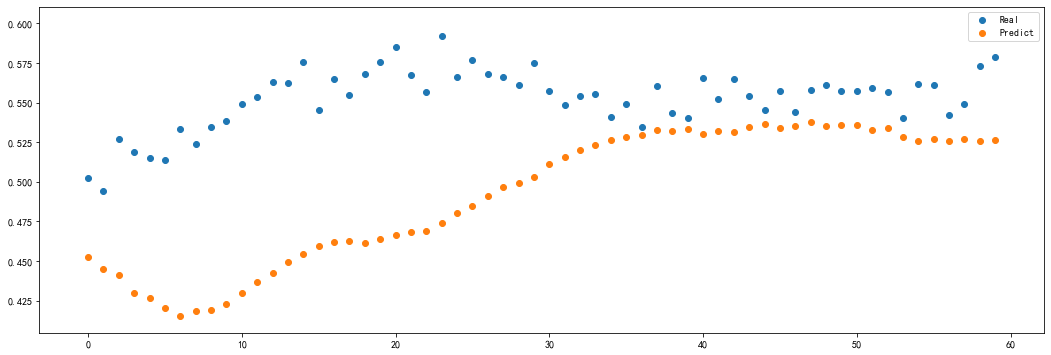

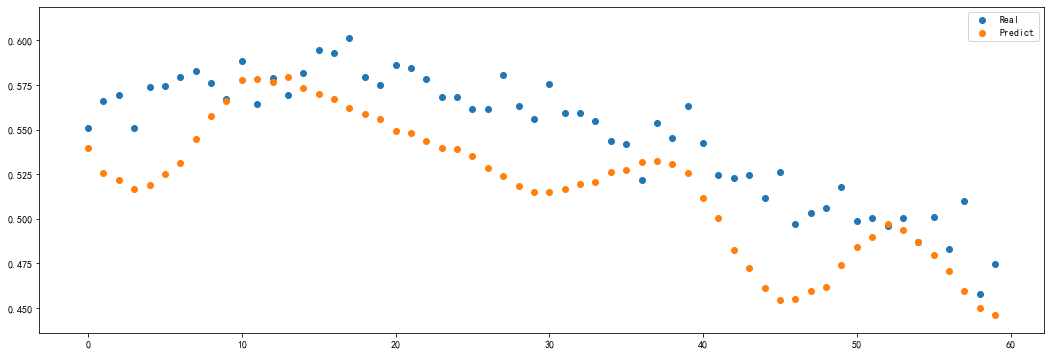

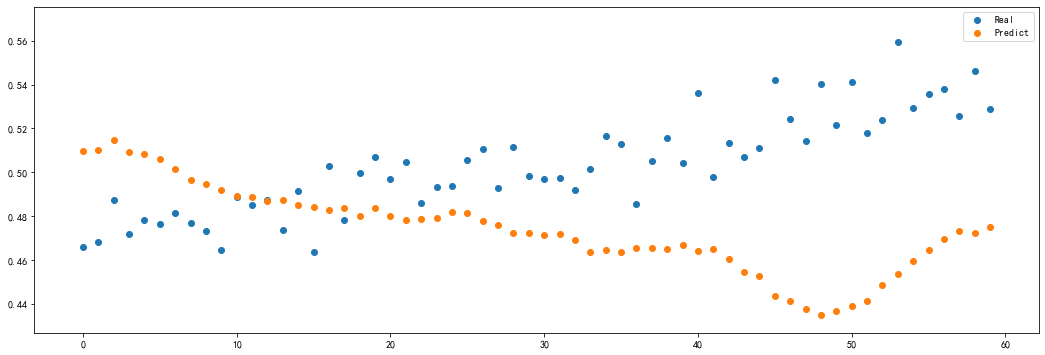

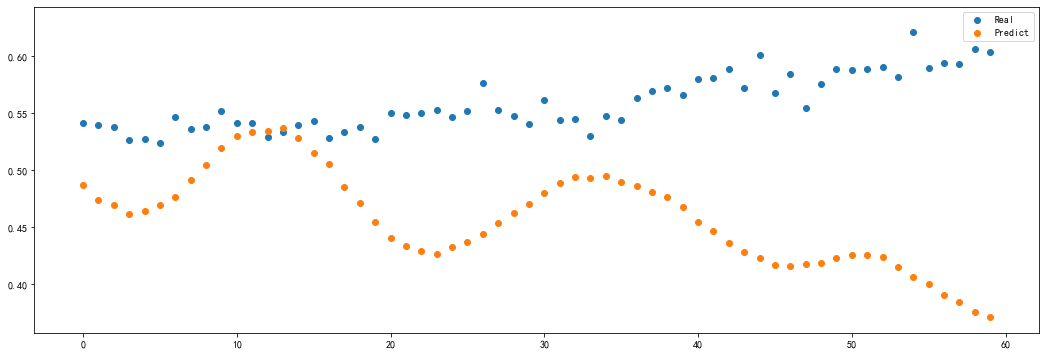

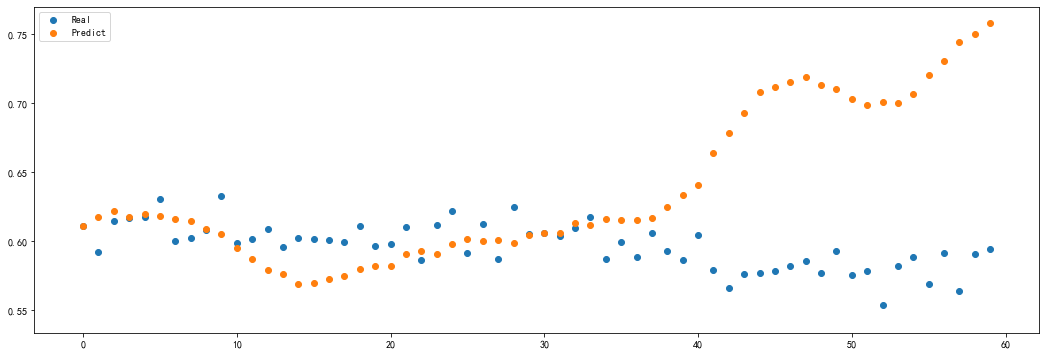

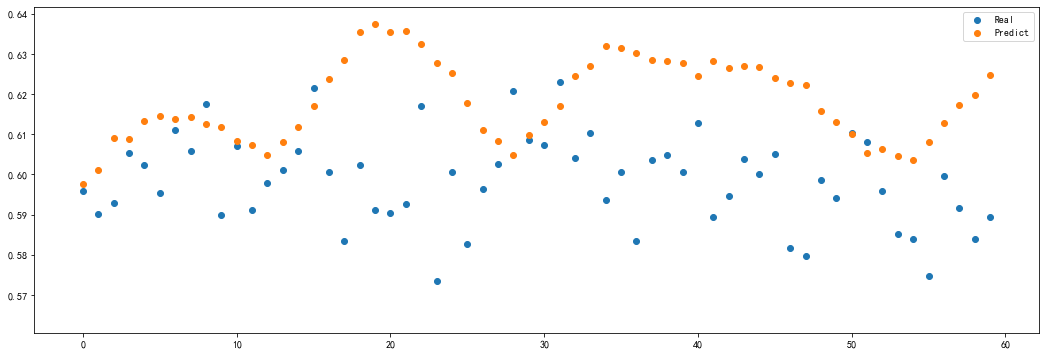

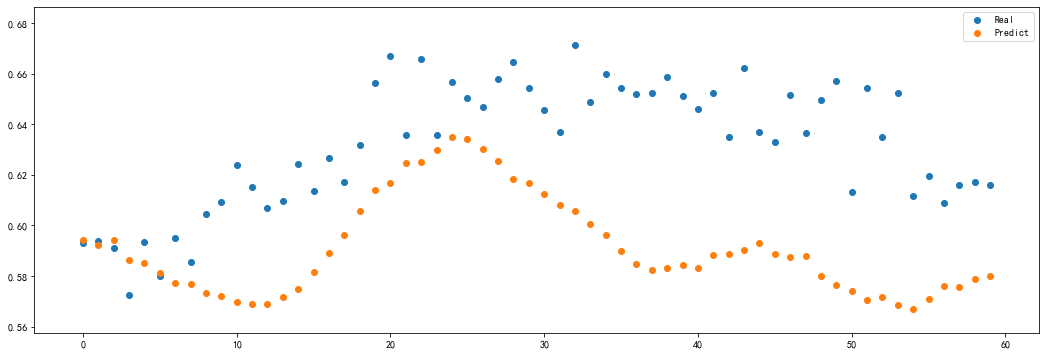

In [ ]:
for i in range(10,20):
    t = np.arange(len(y_test_predict[i*60]))
    plt.figure(figsize=(18,6))
    # plt.plot(t, y_test_true[i*60],"rs-", linewidth=1, label='Real')
    plt.scatter(t, y_test_true[i*60], label='Real')
    # plt.plot(t, y_test_predict[i*60], 'go-', linewidth=1, label='Predict')
    plt.scatter(t, y_test_predict[i*60], label='Predict')

    plt.legend()
    plt.show()